# Zipline Pipeline

In [9]:
import pandas as pd
import yfinance as yf
import tqdm
import logging
import os
from zipline.utils.calendar_utils import get_calendar
# Set up logging to capture errors
logging.basicConfig(filename='download_errors.log', level=logging.ERROR)

# Load CSV data
df = pd.read_csv('https://raw.githubusercontent.com/rbpal/01-qt-project-03-smart-beta-portfolio-optimization/main/eod-quotemedia.csv', index_col=False)

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Define output directory
output_dir = '../../Data/data/eod-quotemedia/daily'
os.makedirs(output_dir, exist_ok=True)

start_session = pd.Timestamp('2013-07-01')
end_session = pd.Timestamp('2017-06-30')

# Get the calendar for the NYSE (or any other exchange you are using)
calendar = get_calendar('NYSE')

# Get the sessions in the specified range
sessions = calendar.sessions_in_range(start_session, end_session)

tickers_to_keep = []
# Group by ticker and process each group
for ticker, group in tqdm.tqdm(df.groupby('ticker')):
    # Ensure 'date' is sorted and in datetime format
    group = group.sort_values('date')
    
    # Get the start and end dates for this ticker
    start_session = pd.Timestamp('2013-07-01')
    end_session = pd.Timestamp('2017-06-30')
    
    try:
        # Download data from yfinance
        dat = yf.download(ticker, start=start_session, end=end_session, progress=False)
        
        # Check if data is returned
        if dat.empty:
            print(f"No data returned for {ticker}.")
            continue
        # ticker_data = dat.dropna()
        trading_days = len(sessions)
        if dat.shape[0] == trading_days-1:
            
            # dat['country'] = 'US'
            # Rename columns to match expected format
            dat.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']
            
            # Rename index and ensure it's in datetime format
            dat.index.name = 'date'
            dat.index = dat.index.tz_localize(None)  # Reve timezone if needed
            
            # Write data to a CSV file with the ticker name
            dat.to_csv(f'{output_dir}/{ticker}.csv', index=True)

    except Exception as e:
        # Log and print errors
        print(f"Error processing {ticker}: {e}")
        logging.error(f"Error processing {ticker}: {e}")

    # Break statement is for debugging; remove in production


  1%|          | 6/495 [00:03<06:48,  1.20it/s]

No data returned for ABC.


  3%|▎         | 13/495 [00:06<05:35,  1.44it/s]

No data returned for ADS.


  4%|▍         | 20/495 [00:09<05:52,  1.35it/s]

No data returned for AGN.


  6%|▋         | 31/495 [00:13<05:33,  1.39it/s]

No data returned for ALXN.


  8%|▊         | 42/495 [00:17<05:11,  1.45it/s]

No data returned for ANTM.


  9%|▉         | 46/495 [00:20<05:29,  1.36it/s]

No data returned for APC.


 10%|█         | 50/495 [00:23<06:19,  1.17it/s]

No data returned for ARNC.


 10%|█         | 51/495 [00:24<07:03,  1.05it/s]

No data returned for ATVI.


 13%|█▎        | 62/495 [00:28<04:55,  1.47it/s]

No data returned for BBT.


 13%|█▎        | 64/495 [00:28<03:10,  2.26it/s]

$BCR: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for BCR.


 14%|█▍        | 70/495 [00:31<03:56,  1.80it/s]

No data returned for BLL.


 15%|█▌        | 76/495 [00:34<05:23,  1.30it/s]

No data returned for CA.


 16%|█▋        | 81/495 [00:35<02:07,  3.24it/s]

$CBG: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for CBG.


 17%|█▋        | 83/495 [00:38<05:20,  1.29it/s]

No data returned for CBS.


 17%|█▋        | 86/495 [00:40<05:31,  1.23it/s]

No data returned for CELG.


 18%|█▊        | 87/495 [00:41<06:19,  1.08it/s]

No data returned for CERN.


 18%|█▊        | 91/495 [00:43<04:36,  1.46it/s]

No data returned for CHK.


 22%|██▏       | 108/495 [00:48<03:00,  2.14it/s]

No data returned for COG.


 24%|██▍       | 119/495 [00:52<04:30,  1.39it/s]

No data returned for CTL.


 24%|██▍       | 121/495 [00:55<07:54,  1.27s/it]

No data returned for CTXS.


 25%|██▌       | 124/495 [00:58<07:34,  1.23s/it]

No data returned for CXO.


 27%|██▋       | 134/495 [01:02<03:55,  1.53it/s]

No data returned for DISCA.


 27%|██▋       | 135/495 [01:03<04:50,  1.24it/s]

No data returned for DISCK.


 27%|██▋       | 136/495 [01:04<05:43,  1.04it/s]

No data returned for DISH.


 28%|██▊       | 140/495 [01:05<02:20,  2.53it/s]

$DPS: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for DPS.


 28%|██▊       | 141/495 [01:06<03:48,  1.55it/s]

No data returned for DRE.


 33%|███▎      | 164/495 [01:14<04:06,  1.34it/s]

No data returned for ETFC.


 35%|███▌      | 175/495 [01:18<02:49,  1.89it/s]

No data returned for FB.


 36%|███▌      | 176/495 [01:19<03:43,  1.43it/s]

No data returned for FBHS.


 37%|███▋      | 182/495 [01:21<03:17,  1.58it/s]

No data returned for FISV.


 37%|███▋      | 185/495 [01:23<04:02,  1.28it/s]

No data returned for FLIR.


 38%|███▊      | 189/495 [01:25<03:21,  1.52it/s]

No data returned for FOX.


 38%|███▊      | 190/495 [01:27<04:44,  1.07it/s]

No data returned for FOXA.


 40%|███▉      | 196/495 [01:28<01:34,  3.17it/s]

$GGP: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for GGP.


 43%|████▎     | 215/495 [01:33<00:54,  5.10it/s]

$HCN: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for HCN.


 44%|████▎     | 216/495 [01:34<02:25,  1.92it/s]

No data returned for HCP.


 46%|████▋     | 229/495 [01:39<03:10,  1.40it/s]

No data returned for HRS.


 48%|████▊     | 240/495 [01:42<02:14,  1.90it/s]

No data returned for INFO.


 51%|█████     | 253/495 [01:47<02:58,  1.36it/s]

No data returned for JEC.


 54%|█████▍    | 267/495 [01:50<00:46,  4.86it/s]

$KORS: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for KORS.


 55%|█████▍    | 270/495 [01:52<02:14,  1.68it/s]

No data returned for KSU.


 55%|█████▍    | 272/495 [01:54<02:38,  1.41it/s]

No data returned for LB.


 56%|█████▌    | 277/495 [01:57<02:49,  1.29it/s]

No data returned for LLL.


 57%|█████▋    | 284/495 [01:58<00:52,  4.01it/s]

$LUK: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for LUK.


 58%|█████▊    | 286/495 [01:59<00:46,  4.51it/s]

$LVLT: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for LVLT.


 62%|██████▏   | 309/495 [02:05<01:52,  1.65it/s]

No data returned for MON.


 65%|██████▍   | 320/495 [02:09<01:35,  1.84it/s]

No data returned for MYL.


 65%|██████▌   | 322/495 [02:11<02:14,  1.29it/s]

No data returned for NBL.


 67%|██████▋   | 330/495 [02:14<01:27,  1.89it/s]

No data returned for NLSN.


 71%|███████   | 349/495 [02:20<01:31,  1.60it/s]

No data returned for PBCT.


 73%|███████▎  | 362/495 [02:25<01:40,  1.32it/s]

No data returned for PKI.


 76%|███████▌  | 376/495 [02:30<01:02,  1.90it/s]

No data returned for PX.


 76%|███████▋  | 378/495 [02:31<01:12,  1.61it/s]

No data returned for PXD.


 77%|███████▋  | 382/495 [02:34<01:28,  1.28it/s]

No data returned for RE.


 78%|███████▊  | 387/495 [02:36<01:08,  1.57it/s]

No data returned for RHT.


 80%|████████  | 396/495 [02:39<00:54,  1.80it/s]

No data returned for RTN.


 84%|████████▎ | 414/495 [02:44<00:16,  4.82it/s]

$SPLS: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for SPLS.


 84%|████████▍ | 416/495 [02:45<00:42,  1.88it/s]

No data returned for STI.


 86%|████████▌ | 424/495 [02:48<00:38,  1.86it/s]

No data returned for SYMC.


 87%|████████▋ | 431/495 [02:51<00:41,  1.55it/s]

No data returned for TIF.


 87%|████████▋ | 433/495 [02:53<00:51,  1.19it/s]

No data returned for TMK.


 89%|████████▉ | 440/495 [02:56<00:37,  1.45it/s]

No data returned for TSS.


 92%|█████████▏| 456/495 [03:01<00:20,  1.92it/s]

No data returned for UTX.


 93%|█████████▎| 458/495 [03:03<00:31,  1.19it/s]

No data returned for VAR.


 93%|█████████▎| 460/495 [03:05<00:34,  1.02it/s]

No data returned for VIAB.


 96%|█████████▌| 475/495 [03:10<00:10,  1.87it/s]

No data returned for WLTW.


 97%|█████████▋| 482/495 [03:11<00:03,  4.18it/s]

$WYN: possibly delisted; No price data found  (1d 2013-07-01 00:00:00 -> 2017-06-30 00:00:00)
No data returned for WYN.


 98%|█████████▊| 484/495 [03:13<00:06,  1.60it/s]

No data returned for XEC.


 98%|█████████▊| 486/495 [03:15<00:06,  1.38it/s]

No data returned for XL.


 98%|█████████▊| 487/495 [03:16<00:06,  1.18it/s]

No data returned for XLNX.


100%|██████████| 495/495 [03:18<00:00,  2.50it/s]


DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-05',
               '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11',
               '2013-07-12', '2013-07-15',
               ...
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', length=1009, freq='C')

In [15]:
# import pandas as pd
# from zipline.data.bundles import register, ingest
# from zipline.data.bundles.csvdir import csvdir_equities
# import logging

# # Set up logging to capture errors
# logging.basicConfig(filename='bundle_errors.log', level=logging.ERROR)

# # Define the bundle name and session dates
# # Ensure these timestamps are timezone-naive or all timezone-aware (consistent with your data)
# start_session = pd.Timestamp('2013-07-01')  # Timezone-naive
# end_session = pd.Timestamp('2017-06-30')    # Timezone-naive


# try:
#     # Register the bundle
#     register(
#         'eod-quotemedia',
#         csvdir_equities(
#             ['daily'],  # This specifies the frequency directory
#             '/home/ankit/AI_for_trading/Data/data/eod-quotemedia/'  # Path to the directory containing data
#         ),
#         calendar_name='XNYS',  # US equities
#         start_session=start_session,
#         end_session=end_session
#     )

#     # Ingest the bundle
#     # ingest('eod-quotemedia')

#     print("Bundle registration and ingestion completed.")

# except Exception as e:
#     # Log and print errors
#     print(f"Error during bundle registration or ingestion: {e}")
#     logging.error(f"Error during bundle registration or ingestion: {e}")


Bundle registration and ingestion completed.


/tmp/ipykernel_17919/1850159331.py:17: UserWarning: Overwriting bundle with name 'eod-quotemedia'
  register(


# Building an Empty Pipeline

Once we have loaded our data, we can start building our Zipline pipeline. We begin by creating an empty Pipeline object using Zipline's `Pipeline` class. A Pipeline object represents a collection of named expressions to be compiled and executed by a Pipeline Engine. The `Pipeline(columns=None, screen=None)` class takes two optional parameters, `columns` and `screen`. The `columns` parameter is a dictionary used to indicate the intial columns to use, and the `screen` parameter is used to setup a screen to exclude unwanted data. 

In the code below we will create a `screen` for our pipeline using Zipline's built-in `.AverageDollarVolume()` class. We will use the `.AverageDollarVolume()` class to produce a 60-day Average Dollar Volume of closing prices for every stock in our universe. We then use the `.top(10)` attribute to specify that we want to filter down our universe each day to just the top 10 assets. Therefore, this screen will act as a filter to exclude data from our stock universe each day. The average dollar volume is a good first pass filter to avoid illiquid assets.

In [7]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline.domain import US_EQUITIES

# Create a screen for our Pipeline
universe = AverageDollarVolume(window_length = 60).top(10)

# Create an empty Pipeline with the given screen
pipeline = Pipeline(screen = universe,domain=US_EQUITIES)

In [3]:
import zipline.data.bundles as bundles

bundle_data = bundles.load('yahoo_NYSE')

# Datasets and Dataloaders               

One of the features of Zipline's Pipeline is that it separates the actual source of the stock data from the abstract description of that dataset. Therefore, Zipline employs **DataSets** and **Loaders** for those datasets. `DataSets` are just abstract collections of sentinel values describing the columns/types for a particular dataset.  While a `loader` is an object which, given a request for a particular chunk of a dataset, can actually get the requested data. For example, the loader used for the `USEquityPricing` dataset, is the `USEquityPricingLoader` class. The `USEquityPricingLoader` class will delegate the loading of baselines and adjustments to lower-level subsystems that know how to get the pricing data in the default formats used by Zipline (`bcolz` for pricing data, and `SQLite` for split/merger/dividend data). As we saw in the beginning of this notebook, data bundles automatically convert the stock data into `bcolz` and `SQLite` formats. It is important to note that the `USEquityPricingLoader` class can also be used to load daily OHLCV data from other datasets, not just from the `USEquityPricing` dataset. Simliarly, it is also  possible to write different loaders for the same dataset and use those instead of the default loader. Zipline contains lots of other loaders to allow you to load data from different datasets.

In the code below, we will use `USEquityPricingLoader(BcolzDailyBarWriter, SQLiteAdjustmentWriter)` to create a loader from a `bcolz` equity pricing directory and a `SQLite` adjustments path. Both the `BcolzDailyBarWriter` and `SQLiteAdjustmentWriter` determine the path of the pricing and adjustment data. Since we will be using the Quotemedia data bundle, we will use the `bundle_data.equity_daily_bar_reader` and the `bundle_data.adjustment_reader` as our `BcolzDailyBarWriter` and `SQLiteAdjustmentWriter`, respectively.

In [5]:
import zipline.utils.calendar_utils as utils
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.engine import SimplePipelineEngine
from zipline.data import bundles

# Define the function for the get_loader parameter
def choose_loader(column):
    if column not in USEquityPricing.columns:
        raise Exception('Column not in USEquityPricing')
    return pricing_loader

bundle_data = bundles.load('yahoo_NYSE')
# Set the trading calendar
trading_calendar = utils.get_calendar('NYSE')

# Create a Pipeline engine
engine = SimplePipelineEngine(get_loader = choose_loader,
                              asset_finder = bundle_data.asset_finder)

In [8]:
import pandas as pd

# Set the start and end dates
start_date = pd.Timestamp('2016-01-05')
end_date = pd.Timestamp('2016-01-06')


# check if start_date is in sessions

# all_sessions = pipeline.domain(default=US_EQUITIES).sessions().to_list()

# session_in_2016 = [session for session in all_sessions if session >= start_date]
# in the list of all sessions containing the Timestamps filter between start_date and end_date


# Run our pipeline for the given start and end dates
pipeline_output = engine.run_pipeline(pipeline, start_date, end_date)

# We print information about the pipeline output
print('The pipeline output has type:', type(pipeline_output), '\n')

# We print whether the pipeline output is a MultiIndex Dataframe
print('Is the pipeline output a MultiIndex Dataframe:', isinstance(pipeline_output.index, pd.core.index.MultiIndex), '\n')

# If the pipeline output is a MultiIndex Dataframe we print the two levels of the index
if isinstance(pipeline_output.index, pd.core.index.MultiIndex):

    # We print the index level 0
    print('Index Level 0:\n\n', pipeline_output.index.get_level_values(0), '\n')

    # We print the index level 1
    print('Index Level 1:\n\n', pipeline_output.index.get_level_values(1), '\n')

ValueError: Failed to find any assets with country_code 'US' that traded between 2016-01-05 00:00:00 and 2016-01-06 00:00:00.
This probably means that your asset db is old or that it has incorrect country/exchange metadata.

In [3]:
import pandas as pd
from zipline.data.bundles import load

bundle_data = load('yahoo_NYSE')
asset_finder = bundle_data.asset_finder

# Retrieve all metadata
all_metadata = asset_finder.retrieve_all(bundle_data.asset_finder.sids)

# Create a DataFrame with custom fields
metadata_df = pd.DataFrame([{
    'sid': asset.sid,
    'symbol': asset.symbol,
    'start_date': asset.start_date,
    'end_date': asset.end_date,
    'exchange': asset.exchange,
    'country_code': getattr(asset, 'country_code', 'Unknown')  # Retrieve custom field
} for asset in all_metadata])

print(metadata_df)

     sid symbol start_date   end_date exchange country_code
0      0      A 2013-07-01 2017-06-29     NYSE           ??
1      1    AAL 2013-07-01 2017-06-29     NYSE           ??
2      2    AAP 2013-07-01 2017-06-29     NYSE           ??
3      3   AAPL 2013-07-01 2017-06-29     NYSE           ??
4      4   ABBV 2013-07-01 2017-06-29     NYSE           ??
..   ...    ...        ...        ...      ...          ...
403  403    XYL 2013-07-01 2017-06-29     NYSE           ??
404  404    YUM 2013-07-01 2017-06-29     NYSE           ??
405  405    ZBH 2013-07-01 2017-06-29     NYSE           ??
406  406   ZION 2013-07-01 2017-06-29     NYSE           ??
407  407    ZTS 2013-07-01 2017-06-29     NYSE           ??

[408 rows x 6 columns]


/tmp/ipykernel_1098227/2251202757.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if equities_hist[-1]> equities_hist.mean():
/home/ankit/miniconda3/envs/Finance/lib/python3.9/site-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
/home/ankit/miniconda3/envs/Finance/lib/python3.9/site-packages/pyfolio/plotting.py:650: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-21.4%' has dtype incompatible with float64, please explicitly cast t

Start date,2014-01-02
End date,2014-12-31
Total months,12
,Backtest
Annual return,-21.4%
Cumulative returns,-21.4%
Annual volatility,16.8%
Sharpe ratio,-1.35
Calmar ratio,-0.81
Stability,0.89
Max drawdown,-26.6%


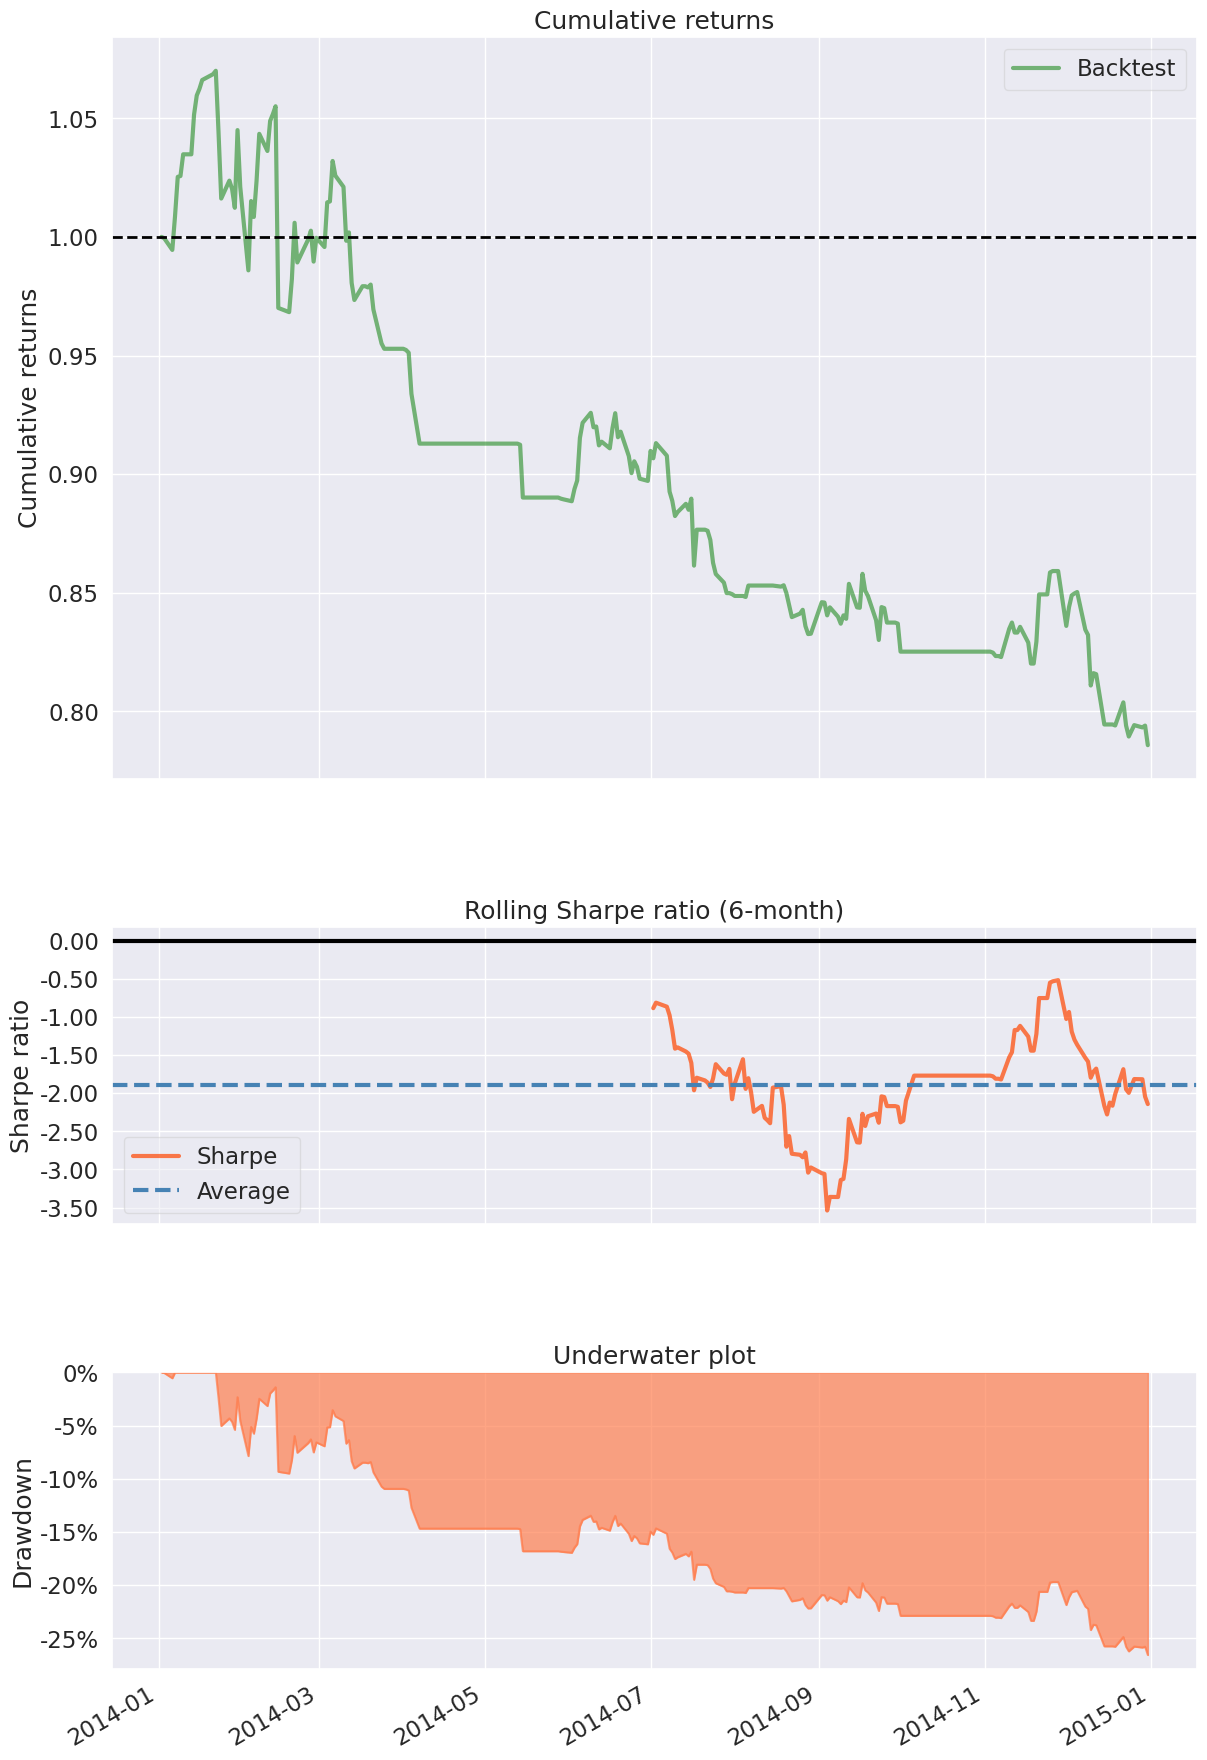

In [2]:
import pandas as pd
from zipline.api import order, record, symbol, schedule_function, attach_pipeline, pipeline_output,order_target_percent
from zipline.utils.events import date_rules, time_rules
from zipline import run_algorithm
from zipline.data.bundles import register
from zipline.utils.calendar_utils import get_calendar
from zipline.utils.events import date_rules, time_rules
from zipline.utils.cli import maybe_show_progress
from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline import Pipeline
import pyfolio as pf
import pytz

from datetime import datetime

# Define your trading algorithm
def initialize(context):
    context.asset = symbol('A')
    
    context.index_average_window = 100

def handle_data(context, data):
    # Get the average dollar volume for the index
    equities_hist = data.history(context.asset, 'close', context.index_average_window, '1d')
    
    if equities_hist[-1]> equities_hist.mean():
        order_target_percent(context.asset, 1)
    else:
        order_target_percent(context.asset, 0)


def analyze(context,perf):
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

    pf.create_simple_tear_sheet(returns)


# Define the start and end dates for the backtest
start = pd.Timestamp('2014-1-1').replace(tzinfo=None)
end = pd.Timestamp('2015-1-1').replace(tzinfo=None)

# Register the custom data bundle
# Run the backtest
data = run_algorithm(
    start=start,
    end=end,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    bundle='yahoo_NYSE',
    data_frequency='daily',
    capital_base=10000,
)

# # Print the results
# print(data.head())
